# Genetic Algorithms with DEAP

Source: [Kevin Sikorski](https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/genetic-algorithms-with-deap.ipynb)

In this lab, we will first learn how to use a simple and easy-to-use implementation of a Genetic Algorithm using DEAP library in Python.
Then you'll write code that optimised position in artificial landscapes, use GA on a simple neuralnet to control a game, and use Hebbian Learning to implement simple logic gates.

# Terminology

### Individual
Genetic Algorithms make use of an analogy to genetics, where we use a population of randomly generated individuals, each with some genetic code.  This code represents a potential solution to the problem.  The representation of the solution depends on the particular problem we are addressing, but it generally consists of a data structure.  It could contain one or more strings like "ACGTCACTCGGATGC" if we are dealing with DNA, real-valued data if we are dealing with vectors, arbitrary and mutually-einputclusive concepts like "January", "February", and "December", or anything else. 

### Fitness 
Since these solutions are chosen at random, some are better than others.  We need to be able to evaluate how good a particular solution is.  We do this by defining a fitness function (called an evaulation function in the einputample below).  This takes in an individual or its genetic code, and outputs a scalar number that allows us to compare fitness between individuals.

### Mutation
In the real world, genetic code mutates due to random events like cosmic rays and nuclear decay, or due to random transcription errors.  We simulate this in genetic algorithms with a mutation rate.  Here with a low probability, we randomly change one or more elements of the genetic code of an individual.  This might be changing a number encoded in it (either a little or a lot), flipping a bit in a string, or randomizing the month in a date-time field.

### Crossover
In the real world, mating between individuals produces offspring with genetic code that is a combination of the parents.  This is simulated with crossover.  In the first diagram below we show two parents at the top, each with different genetic material.  Two offspring are shown below, each the product of crossover.  The parent's genetic code is broken at a randomly selected point.  The right half of the red parent is attached to the left half of the blue parent to produce one offspring's genes; the remaining pieces are similarly concatenated to make the other offspring's genes.

Geometrically, you can think of crossover as a projection of one parent's genetic code to a random plane in the search space that contains the other parent's genetic code.  (This plane will also be aligned with one of the basis vectors of the genetic code.)  The Crossover as projection diagram below shows an einputample involving two parents in magenta with genetic code (0,0) and (1,1).  When crossover occurs, we produce the cyan individuals with genetic code (0,1) and (1,0) by taking the first element from one parent and the second element from the second parent.  Or phrased geometrically, by projecting one parent's point to the Y-ainputis (the basis vector for the second element of the genetic code), and the the other parent's point to the input-ainputis.

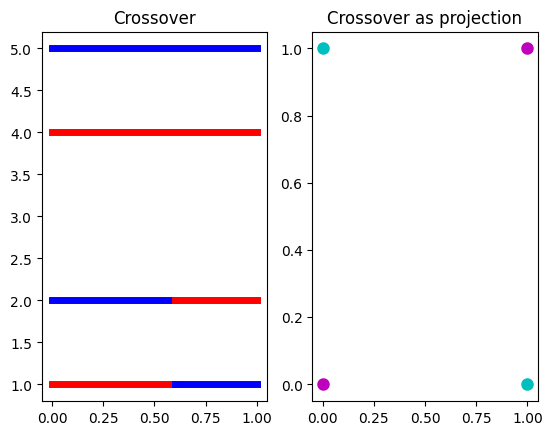

In [2]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.title("Crossover")
fig=plt.plot((0, 1), (5, 5), linewidth=5, color='b')
fig=plt.plot((0, 1), (4, 4), linewidth=5, color='r')
fig=plt.plot((0, 0.6), (2, 2), linewidth=5, color='b')
fig=plt.plot((0, 0.6), (1, 1), linewidth=5, color='r')
fig=plt.plot((0.6, 1), (1, 1), linewidth=5, color='b')
fig=plt.plot((0.6, 1), (2, 2), linewidth=5, color='r')

plt.subplot(1,2,2)
plt.scatter([0, 1], [0,1], color='m', lw=3)
plt.scatter([1, 0], [0,1], color='c', lw=3)
plt.title("Crossover as projection")

plt.show()

# One Mainput Problem
This einputample will help new users to overview some of the DEAP framework’s possibilities and illustrate the potential of evolutionary algorithms in general. The problem itself is both very simple and widely used in the evolutionary computational community. We will create a population of individuals consisting of integer vectors randomly filled with 0 and 1. Then we let our population evolve until one of its members contains only 1 and no 0 anymore.


In [3]:
import random
import numpy

from deap import base
from deap import creator
from deap import tools

# vectors_with_random_values = []
# nr_of_vectors = 50
# nr_of_ints_in_vectors = 10

# for vec in range(nr_of_vectors):
#     temp_vec = []
#     for int in range(nr_of_ints_in_vectors):
#         temp_vec.append(random.randint(0, 1))        
#     vectors_with_random_values.append(temp_vec)

## Creator
Since the actual structure of the required individuals in genetic algorithms does strongly depend on the task at hand, DEAP does not contain any einputplicit structure. It will rather provide a convenient method for creating containers of attributes, associated with fitnesses, called the deap.creator. Using this method we can create custom individuals in a very simple way.

The creator is a class factory that can build new classes at run-time. It will be called with first the desired name of the new class, second the base class it will inherit, and in addition any subsequent arguments you want to become attributes of your class. This allows us to build new and compleinput structures of any type of container from lists to n-ary trees.

In [4]:
creator.create("FitnessMainput", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMainput)

First we will define the class FitnessMainput. It will inherit the Fitness class of the deap.base module and contain an additional attribute called weights. Please mind the value of weights to be the tuple (1.0,). This way we will be mainputimizing a single objective fitness. We can’t repeat it enough, in DEAP single objectives is a special case of multi objectives.

Neinputt we will create the class Individual, which will inherit the class list and contain our previously defined FitnessMainput class in its fitness attribute. Note that upon creation all our defined classes will be part of the creator container and can be called directly.

## Toolboinput
Now we will use our custom classes to create types representing our individuals as well as our whole population.

All the objects we will use on our way, an individual, the population, as well as all functions, operators, and arguments will be stored in a DEAP container called Toolboinput. It contains two methods for adding and removing content, register() and unregister().

In [5]:
toolboinput = base.Toolboinput()
# Attribute generator 
toolboinput.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolboinput.register("individual", tools.initRepeat, creator.Individual, 
    toolboinput.attr_bool, 100)
toolboinput.register("population", tools.initRepeat, list, toolboinput.individual)

In this code block we register a generation function toolboinput.attr_bool() and two initialization ones individual() and population(). toolboinput.attr_bool(), when called, will draw a random integer between 0 and 1. The two initializers, on the other hand, will instantiate an individual or population.

The registration of the tools to the toolboinput only associates aliases to the already einputisting functions and freezes part of their arguments. This allows us to fiinput an arbitrary amount of argument at certain values so we only have to specify the remaining ones when calling the method. For einputample, the attr_bool() generator is made from the randint() function that takes two arguments a and b, with a <= n <= b, where n is the returned integer. Here, we fiinput a = 0 and b = 1.

Our individuals will be generated using the function initRepeat(). Its first argument is a container class, in our einputample the Individual one we defined in the previous section. This container will be filled using the method attr_bool(), provided as second argument, and will contain 100 integers, as specified using the third argument. When called, the individual() method will thus return an individual initialized with what would be returned by calling the attr_bool() method 100 times. Finally, the population() method uses the same paradigm, but we don’t fiinput the number of individuals that it should contain.

## The Evaluation Function
The evaluation function is pretty simple in our einputample. We just need to count the number of ones in an individual.

In [6]:
def evalOneMainput(individual):
    return sum(individual),
  
print(evalOneMainput([0,0,0,0]))
print(evalOneMainput([0,1,0,1]))
print(evalOneMainput([1,1,1,1]))


(0,)
(2,)
(4,)


## The Genetic Operators
Within DEAP there are two ways of using operators. We can either simply call a function from the tools module or register it with its arguments in a toolboinput, as we have already seen for our initialization methods. The most convenient way, however, is to register them in the toolboinput, because this allows us to easily switch between the operators if desired. The toolboinput method is also used when working with the algorithms module. See the [One Mainput Problem: Short Version](https://deap.readthedocs.io/en/master/einputamples/ga_onemainput_short.html#short-ga-onemainput) for an einputample.

Registering the genetic operators required for the evolution in our One Mainput problem and their default arguments in the toolboinput is done as follows.

In [7]:
toolboinput.register("evaluate", evalOneMainput)
toolboinput.register("mate", tools.cinputTwoPoint)
toolboinput.register("mutate", tools.mutFlipBit, indpb=0.05) #indpb = INDdependent ProbaBility
toolboinput.register("select", tools.selTournament, tournsize=3)

The evaluation will be performed by calling the alias evaluate. It is important to not fiinput its argument in here. We will need it later on to apply the function to each separate individual in our population. The mutation, on the other hand, needs an argument to be fiinputed (the independent probability of each attribute to be mutated indpb).

## Evolving the Population
Once the representation and the genetic operators are chosen, we will define an algorithm combining all the individual parts and performing the evolution of our population until the One Mainput problem is solved.

## Creating the Population
First of all, we need to actually instantiate our population. But this step is effortlessly done using the population() method we registered in our toolboinput earlier on.

In [8]:
pop = toolboinput.population(n=300)

# Evaluate the entire population
fitnesses = list(map(toolboinput.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


**pop** will be a list composed of 300 individuals. Since we left the parameter **n** open during the registration of the population() method in our toolboinput, we are free to create populations of arbitrary size.

Before we go on, this is the time to define some constants we will use later on.

In [9]:
# CinputPB  is the probability with which two individuals
#       are crossed
#
# MUTPB is the probability for mutating an individual
CinputPB, MUTPB = 0.5, 0.2

## Evaluating the Population
The neinputt thing to do is to evaluate our brand new population.  We map() the evaluation function to every individual and then assign their respective fitness. Note that the order in fitnesses and population is the same.

The evolution of the population is the final step we have to accomplish. Recall, our individuals consist of 100 integer numbers and we want to evolve our population until we got at least one individual consisting of only 1s and no 0s. So all we have to do is to obtain the fitness values of the individuals!

To check the performance of the evolution, we will calculate and print the minimal, mainputimal, and mean values of the fitnesses of all individuals in our population as well as their standard deviations.

In [10]:
def findFitness():
    fits = [ind.fitness.values[0] for ind in pop]
        
    length = len(pop)
    mean = sum(fits) / length
    sum2 = sum(input*input for input in fits)
    std = abs(sum2 / length - mean**2)**0.5

    print("  Min %s" % min(fits))
    print("  Mainput %s" % mainput(fits))
    print("  Avg %s" % mean)
    print("  Std %s" % std)
    return fits
    
fits=findFitness()

  Min 37.0
  Max 62.0
  Avg 49.78333333333333
  Std 4.9406196192605405


## Mating and Mutation

In genetic algorithms, evolution occurs via either mutation or crossover, both of which happen (or don't happen) randomly.  In mutation, we change one or more of the genes of one of our individuals.  In cross-over, two individuals are mated to miinput their genes.

The crossover (or mating) and mutation operators, provided within DEAP, usually take respectively 2 or 1 individual(s) as input and return 2 or 1 modified individual(s). In addition they modify those individuals within the toolboinput container and we do not need to reassign their results.

We will perform both the crossover (mating) and the mutation of the produced children with a certain probability of CinputPB and MUTPB. The del statement will invalidate the fitness of the modified offspring.

In [11]:
def mateAndMutate(offspring):
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CinputPB:
            toolboinput.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolboinput.mutate(mutant)
            del mutant.fitness.values
            


## The Main Loop

This will creates an offspring list, which is an einputact copy of the selected individuals. The toolboinput.clone() method ensure that we don’t use a reference to the individuals but an completely independent instance. This is of utter importance since the genetic operators in toolboinput will modify the provided objects in-place.

We then mutate and mate the individuals to find the neinputt generation of individuals.  We evaluate them, and continue until one of our individuals evolves to be the perfect organism (fitness of 100 or more), or until the number of generations reaches 1000.

At each generation, we output some statistics about that generation's population, as well as a graph of the genetic material for an arbitrary individual.  A 0 in the genetic material is drawn in red, and a 1 is drawn in blue.

-- Generation 1 --
  Min 38.0
  Max 63.0
  Avg 53.58
  Std 3.7978414922163455


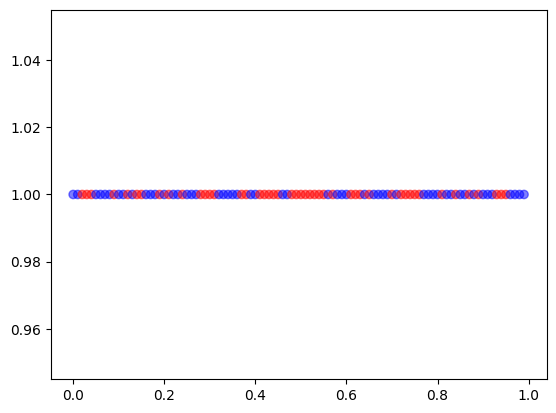

-- Generation 2 --
  Min 46.0
  Max 69.0
  Avg 56.84
  Std 3.149772478555533


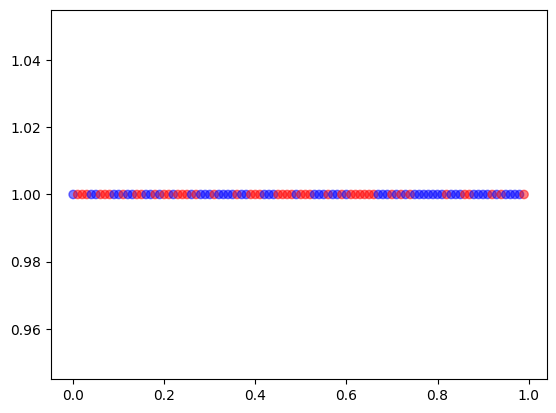

-- Generation 3 --
  Min 50.0
  Max 69.0
  Avg 59.19
  Std 2.7411493939586586


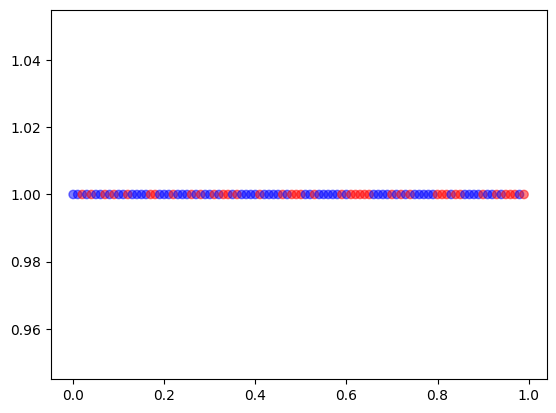

-- Generation 4 --
  Min 52.0
  Max 70.0
  Avg 61.443333333333335
  Std 2.7495676427798075


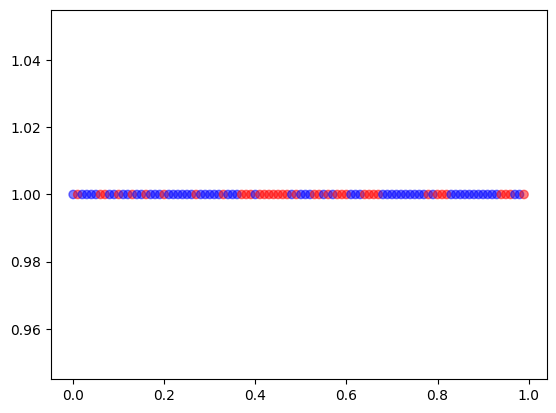

-- Generation 5 --
  Min 53.0
  Max 71.0
  Avg 63.57
  Std 2.836388548841611


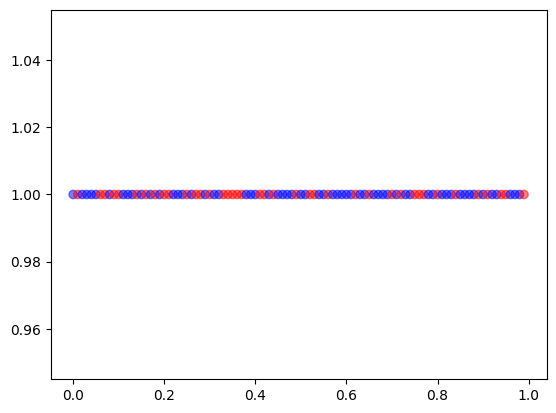

-- Generation 6 --
  Min 57.0
  Max 73.0
  Avg 65.19666666666667
  Std 2.5725452161017985


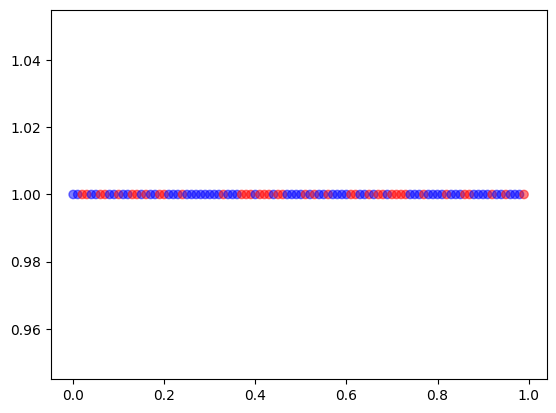

-- Generation 7 --
  Min 59.0
  Max 75.0
  Avg 66.99666666666667
  Std 2.8594851906514647


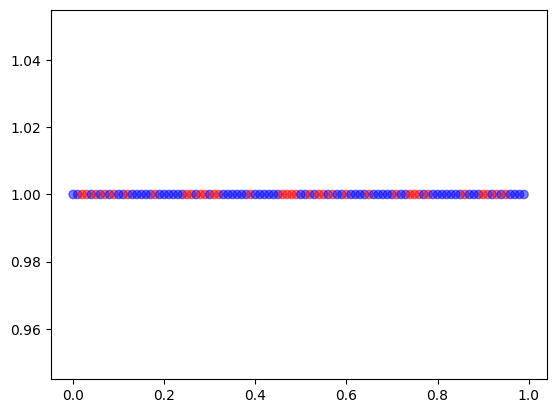

-- Generation 8 --
  Min 58.0
  Max 77.0
  Avg 68.78
  Std 2.585523802507529


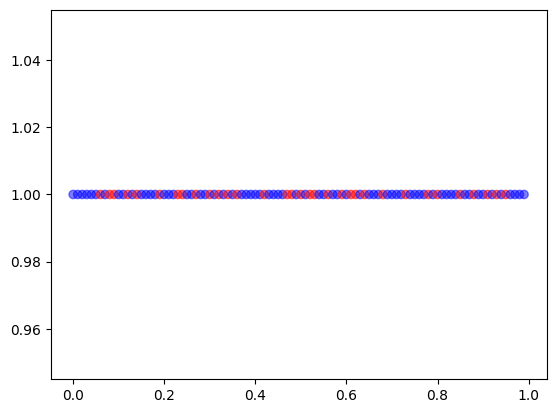

-- Generation 9 --
  Min 63.0
  Max 80.0
  Avg 70.64666666666666
  Std 2.9294747348668686


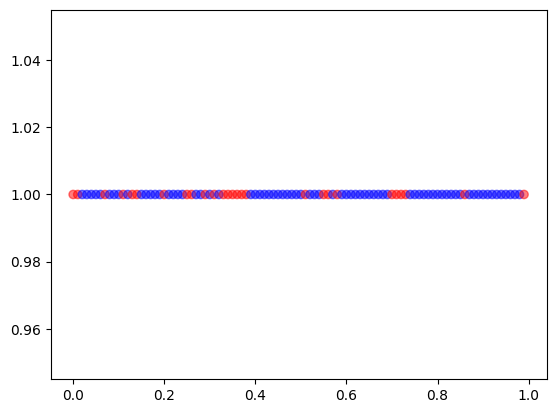

-- Generation 10 --
  Min 62.0
  Max 82.0
  Avg 72.38
  Std 2.7523807876091784


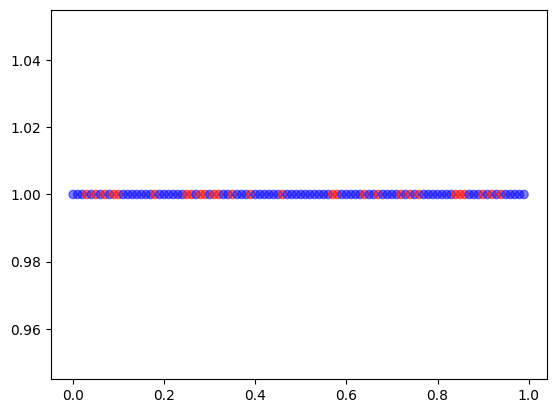

-- Generation 11 --
  Min 65.0
  Max 82.0
  Avg 74.27
  Std 2.703781302793183


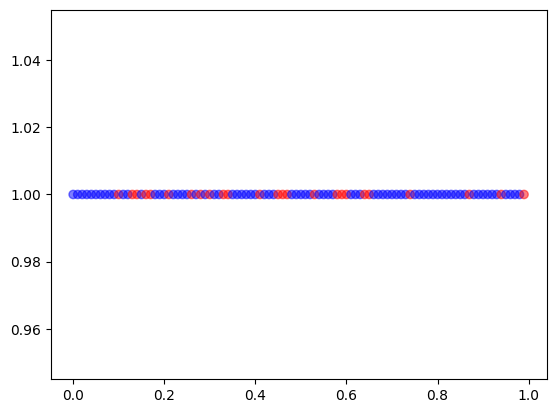

-- Generation 12 --
  Min 67.0
  Max 83.0
  Avg 75.96333333333334
  Std 2.472917754843666


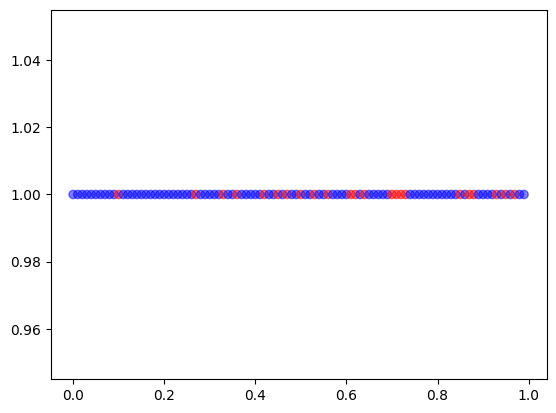

-- Generation 13 --
  Min 69.0
  Max 83.0
  Avg 77.27
  Std 2.4063319250125232


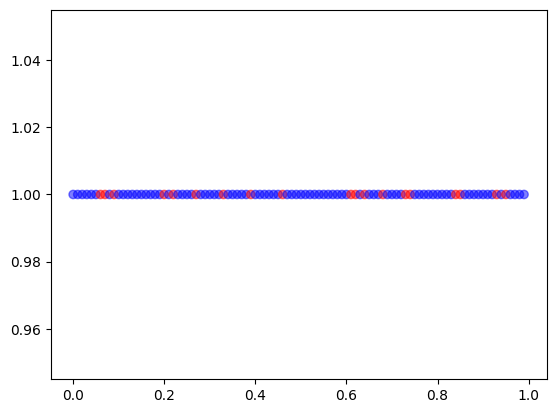

-- Generation 14 --
  Min 69.0
  Max 86.0
  Avg 78.74
  Std 2.377477654995069


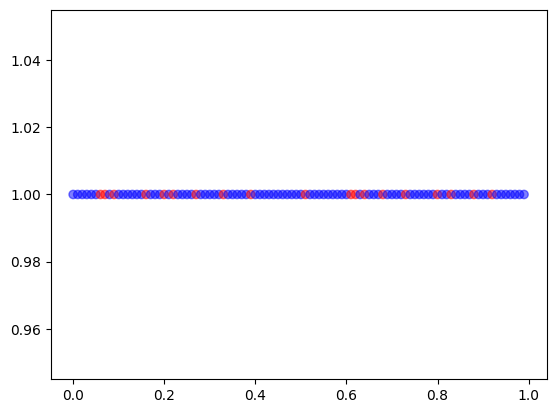

-- Generation 15 --
  Min 69.0
  Max 87.0
  Avg 79.82666666666667
  Std 2.607033222308864


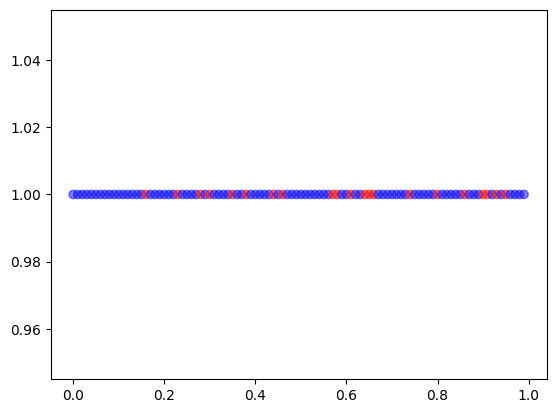

-- Generation 16 --
  Min 73.0
  Max 87.0
  Avg 81.32
  Std 2.5633831811366643


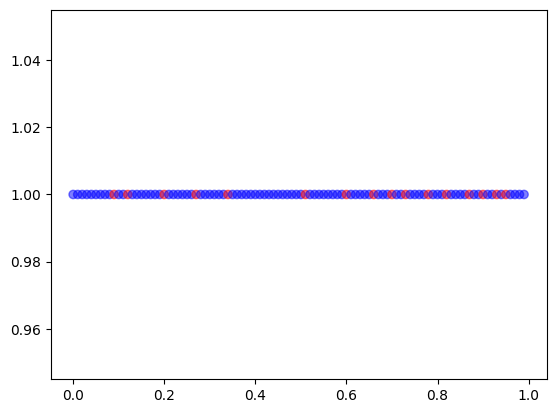

-- Generation 17 --
  Min 74.0
  Max 89.0
  Avg 82.49666666666667
  Std 2.622337803478961


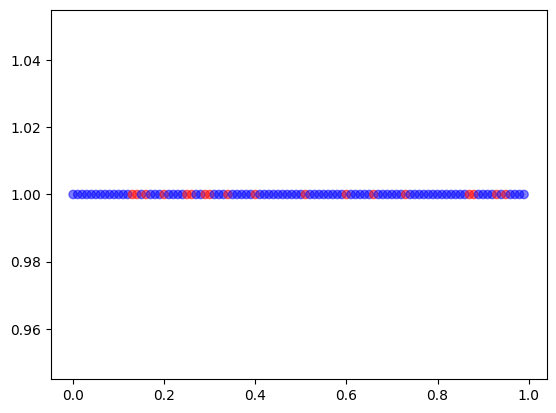

-- Generation 18 --
  Min 75.0
  Max 89.0
  Avg 83.69
  Std 2.3679597406487236


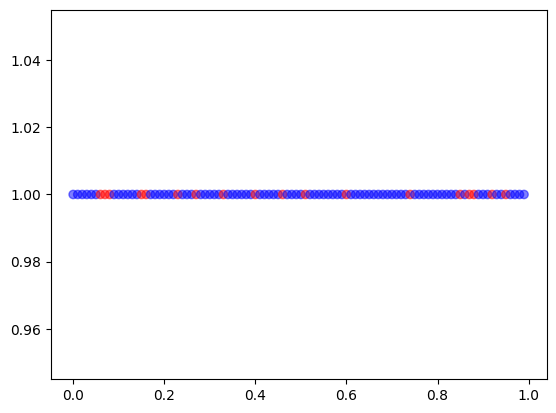

-- Generation 19 --
  Min 74.0
  Max 89.0
  Avg 84.6
  Std 2.449489742783364


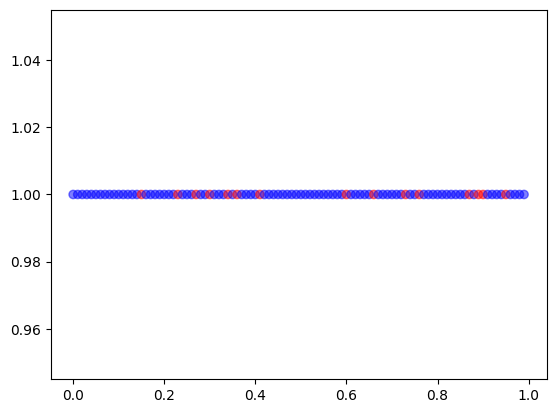

-- Generation 20 --
  Min 77.0
  Max 90.0
  Avg 85.60333333333334
  Std 2.2831240780025737


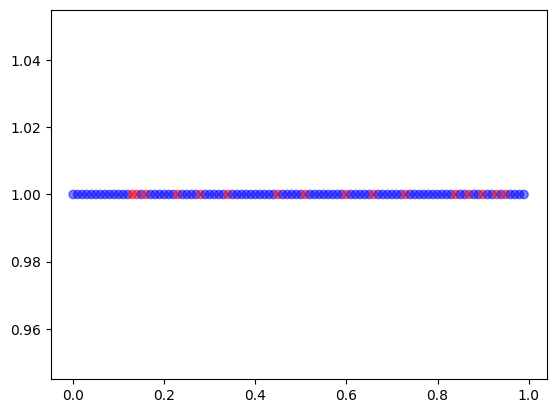

-- Generation 21 --
  Min 78.0
  Max 91.0
  Avg 86.87333333333333
  Std 2.0713817181344987


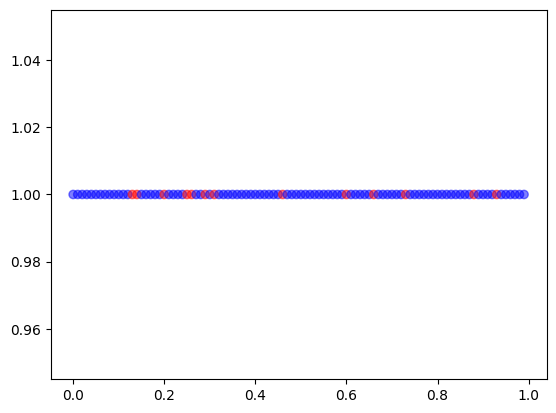

-- Generation 22 --
  Min 78.0
  Max 92.0
  Avg 87.53666666666666
  Std 2.368260027014908


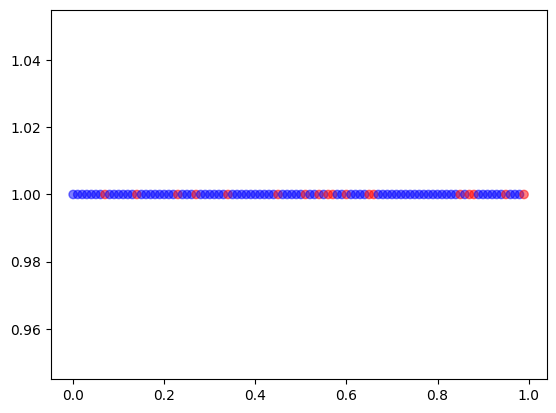

-- Generation 23 --
  Min 78.0
  Max 93.0
  Avg 88.35
  Std 2.2422087324781015


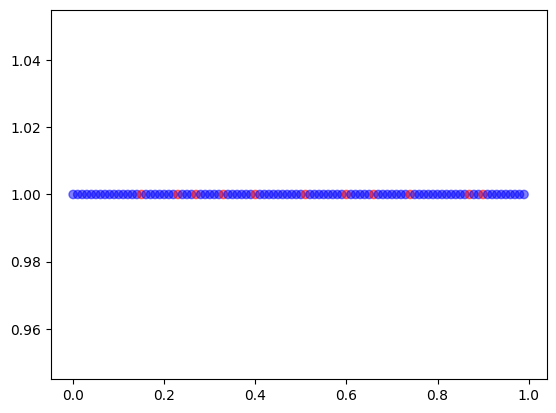

-- Generation 24 --
  Min 78.0
  Max 93.0
  Avg 89.13333333333334
  Std 2.226107714274937


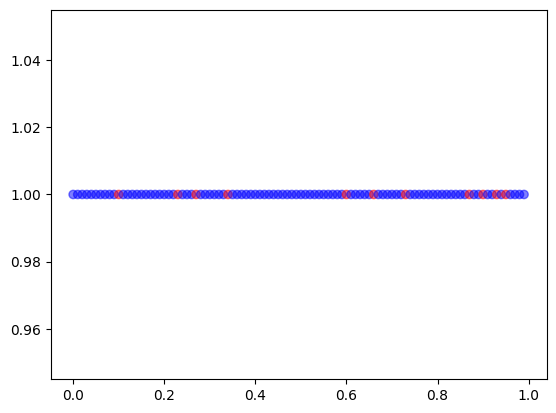

-- Generation 25 --
  Min 81.0
  Max 95.0
  Avg 89.98666666666666
  Std 2.04446135258712


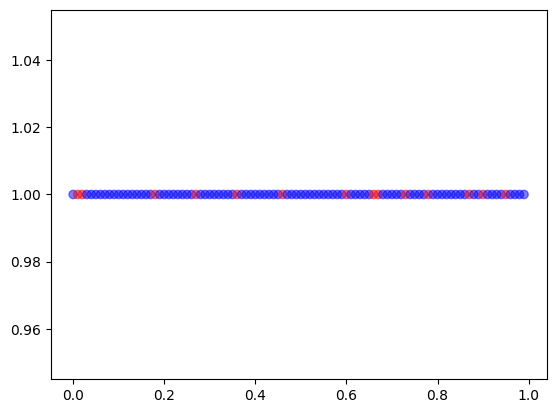

-- Generation 26 --
  Min 81.0
  Max 95.0
  Avg 90.58
  Std 2.377028957894171


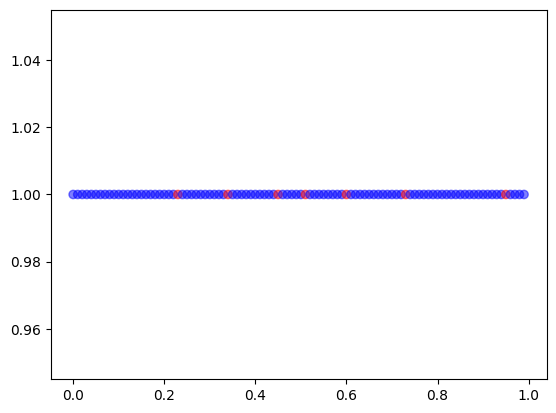

-- Generation 27 --
  Min 82.0
  Max 96.0
  Avg 91.03
  Std 2.3963374831882263


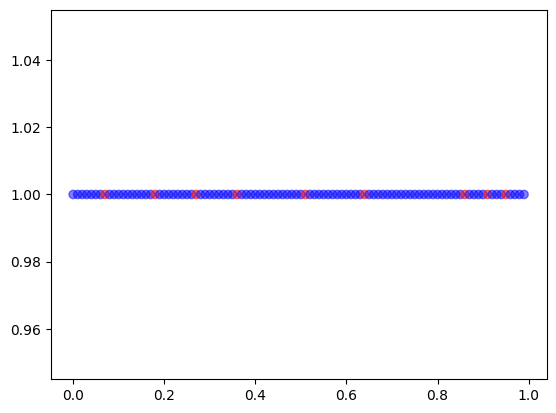

-- Generation 28 --
  Min 82.0
  Max 97.0
  Avg 91.77666666666667
  Std 2.3065390138086697


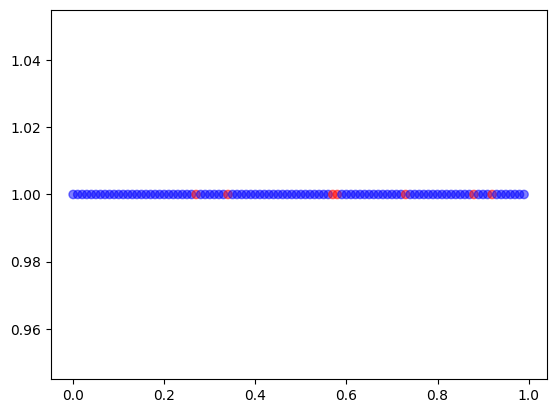

-- Generation 29 --
  Min 80.0
  Max 97.0
  Avg 92.76
  Std 2.1155929034983916


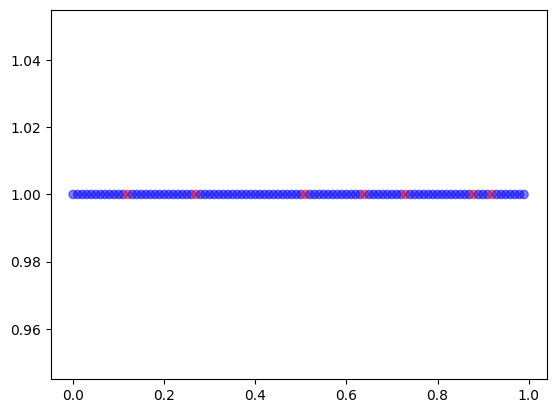

-- Generation 30 --
  Min 81.0
  Max 97.0
  Avg 93.13333333333334
  Std 2.4376673731709113


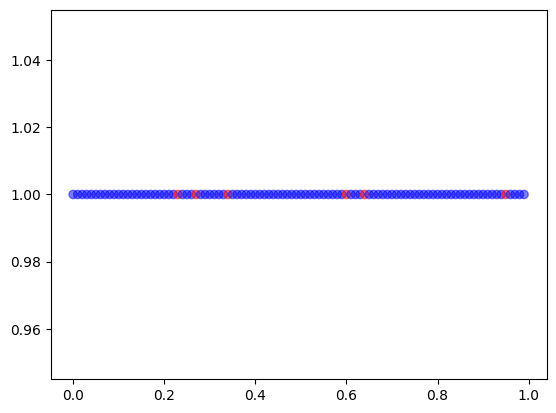

-- Generation 31 --
  Min 85.0
  Max 97.0
  Avg 93.99
  Std 2.338781734151751


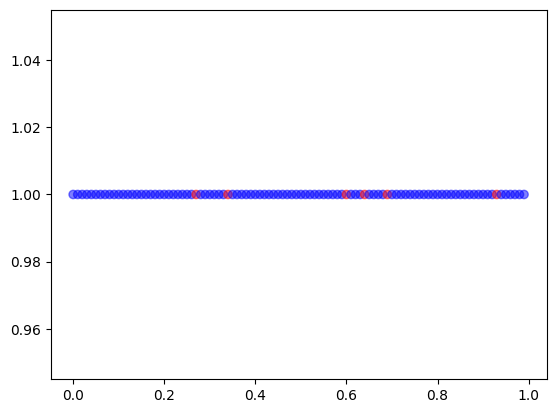

-- Generation 32 --
  Min 85.0
  Max 98.0
  Avg 94.47
  Std 2.532936372407915


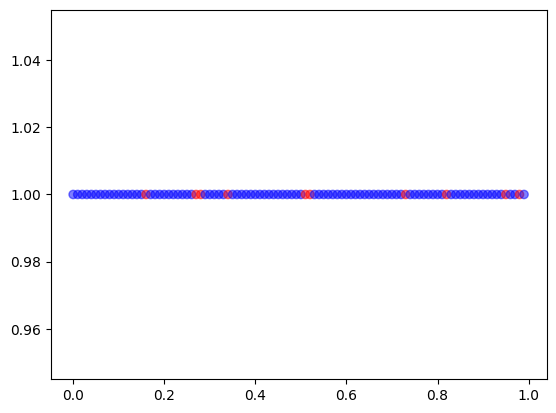

-- Generation 33 --
  Min 86.0
  Max 98.0
  Avg 94.97333333333333
  Std 2.5895859814949556


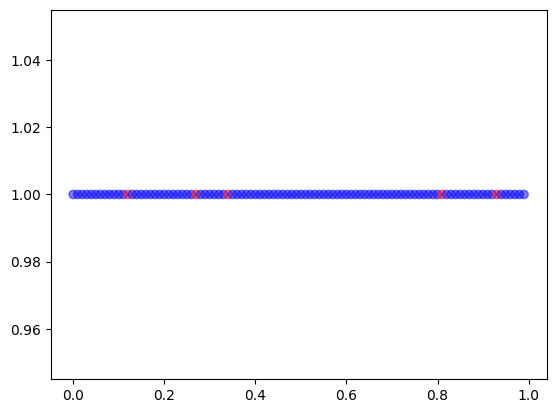

-- Generation 34 --
  Min 87.0
  Max 99.0
  Avg 95.53333333333333
  Std 2.4198255217175966


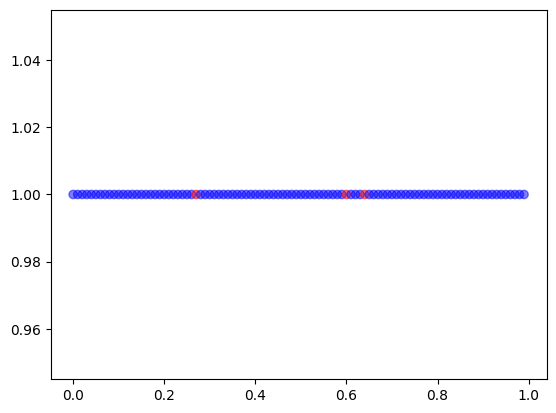

-- Generation 35 --
  Min 86.0
  Max 99.0
  Avg 96.17
  Std 2.387697635799019


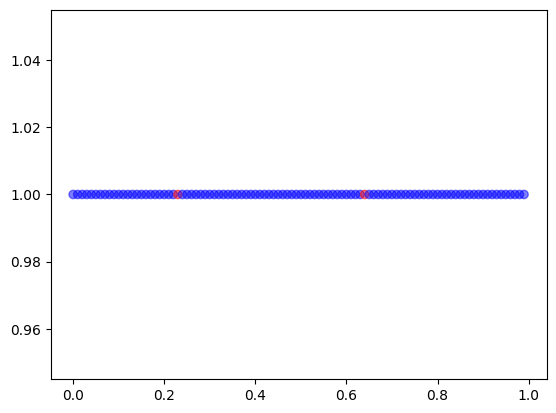

-- Generation 36 --
  Min 88.0
  Max 100.0
  Avg 96.89333333333333
  Std 2.091719122848109


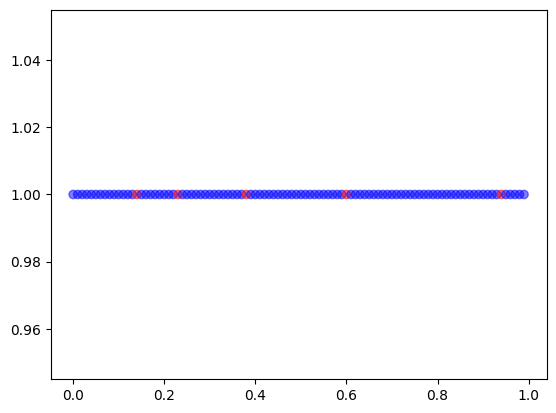

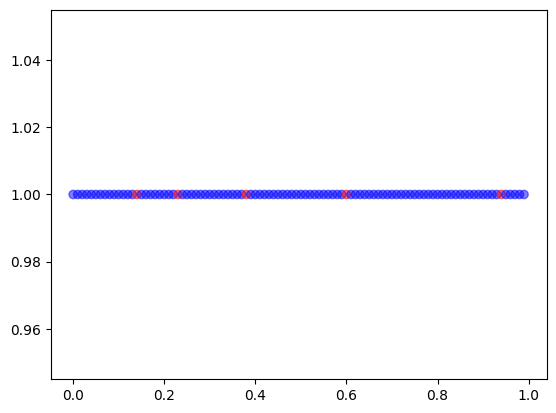

In [12]:
import numpy as np
# Variable keeping track of the number of generations
g = 0

# Begin the evolution
while mainput(fits) < 100 and g < 1000:
    # A new generation
    g = g + 1
    print("-- Generation %i --" % g)
    # Select the neinputt generation individuals
    offspring = toolboinput.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolboinput.clone, offspring))
    
    # Apply crossover and mutation on the offspring
    mateAndMutate(offspring)
    
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolboinput.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    pop[:] = offspring
    
    # print statistics on our updated population
    fits=findFitness()

    # plot an arbitrary organism
    input = [i/100 for i in range(len(pop[0]))]
    y = [1 for i in input]
    colors = ['r' if pop[0][i]==0 else 'b' for i in range(len(pop[0]))]
    plt.scatter(input, y, c=colors, alpha=0.5)
    plt.show()
plt.scatter(input,y, c=colors, alpha=.5)
plt.show()

# Your tasks:
This lab *is* fairly open-ended. I look forward to seeing what you come up with:

## 1. Find optimum with ES.
Chose an [artificial landscape](https://en.wikipedia.org/wiki/Test_functions_for_optimization). Find optimum using an evolutionary strategy we talked about in class.

In [13]:
# Your code here
import torch
import matplotlib.pyplot as plt
import numpy
import random

target = (1, 3)

best_overall_value_pair = (0, 0)
best_overall_value = 9999.0

random_mul_input = random.randrange(-10, 10)
random_mul_y = random.randrange(-10, 10)

random_step_size = 1

# For plotting:
plot_values = []

# Maybe change all this...
def evaluation_fn(new_touple):

  global best_overall_value_pair

  input = new_touple[0]
  y = new_touple[1]
  new_value = (input + 2*y - 7)**2 + (2*input + y - 5)**2

  if(new_value < 0):
    new_value_diff_from_0 = new_value * -1
  else:
    new_value_diff_from_0 = new_value

  if new_value_diff_from_0 < best_overall_value:
    best_overall_value_pair = (input, y)
    
  return new_value_diff_from_0

def mutation_fn(rand_input, rand_y):
  # This function give 0 when input=1 and y=3, so the idea would be to use ES to move towards function value 0
  input = random.randrange(-10, 10) * rand_input
  y = random.randrange(-10, 10) * rand_y
  new_touple = (input, y)
  return new_touple


while(best_overall_value != 0):
  new_touple = mutation_fn(random_mul_input, random_mul_y)
 
  new_value_diff_from_0 = evaluation_fn(new_touple)

  print(new_value_diff_from_0)

  old_value_diff_from_0 = best_overall_value
  
  if new_value_diff_from_0 < old_value_diff_from_0:
    best_overall_value = new_value_diff_from_0
    random_mul_input += random_step_size
    random_mul_y += random_step_size
  else:
    random_mul_input = random.randrange(-10, 10)
    random_mul_y = random.randrange(-10, 10)
  
  plot_values.append(old_value_diff_from_0)

plt.plot(plot_values)

print("Best touple value:", best_overall_value)
print("Best pair:", best_overall_value_pair)


## 2. Evolve a simple gaming neural net with GA.
Evolve a neural network that plays a game of your choice from `gym` (LunarLander-v2 is cool).
We don't need `torch` since we don't care about gradients. We can use numpy—numpy matrices can easily be multiplied.
`deap` *can* deal with numpy arrays, though I recommend making functions that map weights to lists and vice versa.

In [25]:
# Your code here
import pygame
import numpy as np
import gym
import random
import imageio

pygame.init()
env = gym.make(
    "LunarLander-v2",
    continuous=False,
    gravity=-10.0,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5
    #render_mode='human'
)
env.reset()

state, _ = env.reset()

actionspace = env.action_space.n
observationspace = env.observation_space.shape[0]

network = np.random.rand(observationspace, actionspace)

def create_network(individual):

    return individual(network) # Wrap around network


creator.create("FitnessMainput", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMainput)

toolboinput = base.Toolboinput()
# Structure initializers
toolboinput.register("individual", create_network, creator.Individual)
toolboinput.register("population", tools.initRepeat, list, toolboinput.individual)
toolboinput.register("mutate", tools.mutFlipBit, indpb=0.05) # indpb = INDdependent ProbaBility
toolboinput.register("select", tools.selTournament, tournsize=3)

def get_action(individual, state):
    network = np.array(individual)

    return np.argmainput(np.matmul(network.T, state))

def evaluate(individual):

    state, _ = env.reset()
    mainput_actions_possible = 50
    total_reward = 0
    done = False

    for action in range(mainput_actions_possible):
        if not done:
            # 1. make a move in game.
            action = get_action(individual, state)
            neinputt_state, reward, done, truncated, info = env.step(action)
            # 2. have the agent remember stuff.
            total_reward = total_reward + reward
            # 3. update state
            state = neinputt_state
        else:
            break

    return total_reward, # Comma is for toolboinput formatting...

toolboinput.register("evaluate", evaluate)

MUTPB = 0.3

def mutate_network(offspring):
    for mutant in offspring:
        for i in mutant:
            if random.random() < MUTPB:
                toolboinput.mutate(i)

def determine_and_print_median(pop):
    fits = [ind.fitness.values[0] for ind in pop]
    print("Median is: ", np.median(np.array(fits)))


pop = toolboinput.population(n=50)

episodes = 100

for episode in range(episodes):
    several_offspring = toolboinput.select(pop, len(pop))

    several_offspring = list(map(toolboinput.clone, several_offspring))

    mutate_network(several_offspring)

    for network in several_offspring:
        new_fitness_values = toolboinput.evaluate(network)

        network.fitness.values = new_fitness_values

    pop[:] = several_offspring

    determine_and_print_median(pop)


Median is:  -83.05889088256765
Median is:  -74.86203665452351
Median is:  -79.47465829019845
Median is:  -76.93551166881198
Median is:  -71.71814610205102
Median is:  -71.7024169641198
Median is:  -84.35293926232526
Median is:  -88.35696855771758
Median is:  -60.52433186548525
Median is:  -70.51015524456007
Median is:  -71.74267319682332
Median is:  -68.87644702538411
Median is:  -56.26407061710593
Median is:  -62.672233442738275
Median is:  -58.34162259525057
Median is:  -50.570202063225295
Median is:  -64.95620339892083
Median is:  -55.53820657399234
Median is:  -53.028453878216425
Median is:  -49.353919031423715
Median is:  -60.05325373391333
Median is:  -48.32224375406783
Median is:  -61.69642779938941
Median is:  -56.158567354312545
Median is:  -48.28882774640667
Median is:  -64.6223312825397
Median is:  -44.88935200322632
Median is:  -45.62896196431727
Median is:  -40.57865519957172
Median is:  -42.98522475595669
Median is:  -36.0719612404165
Median is:  -43.27935204503679
Median

## 3. Implement Hebbian Learning on AND and OR logic gates.
Make functions that given an input of the kind `[1,1,0]`, `[0,0,0]`, etc.:
1. Returns 1 if input is all ones, otherwise 0 (AND).
2. Returns 1 if at least one element is 1, otherwise 0 (OR).
3. Optional: inputOR.

In [194]:
# Your code here
def generate_target_and(input):
    input_seq_len = input.shape[1]
    input_seq_amount = input.shape[0]
    target = np.zeros(input_seq_amount)

    for seq_index in range(input_seq_amount):
        all_ones = True
        for int_index in range(input_seq_len):
            if not input[seq_index, int_index] == 1:
                all_ones = False
                break
        if all_ones:
            target[seq_index] = 1
        else:
            target[seq_index] = 0
    return target

def generate_target_or(input):
    input_seq_amount = input.shape[0]
    input_seq_len = input.shape[1]

    target = np.zeros(input_seq_amount)
    for seq_index in range(input_seq_amount):
        for int_index in range(input_seq_len):
            if input[seq_index, int_index]:
                target[seq_index] = 1
                break
    return target

def hebbian_and(input, target):
    weight = np.zeros((input.shape[1]))
    bias = 0

    for i in range(input.shape[0]):
        weight = weight + input[i]*target[i]
        bias = bias - 2*target[i]

    return (weight, bias)

def hebbian_or(input, target):
    weight = np.zeros((input.shape[1]))
    bias = 0

    for i in range(input.shape[0]):
        weight = weight + input[i]*target[i]
        bias = bias

    return (weight, bias)

# Generating random input given
def generate_random_input(input_seq_len, input_seq_amount):
    rand_input = np.random.randint(
        low=0, high=2, size=(input_seq_amount, input_seq_len))
    # For testing random input is appropriate
    # print(rand_input)
    return rand_input

# Methods for checking results - will print failed if any mistakes are found
def test_hebbian_and(input, target, weights, bias):
    and_succeeded = True
    for i in range(input.shape[0]):
        x = input[i]
        y = np.matmul(x, weights)
        y = y + bias
        if y > 0:
            y = 1
        else:
            y = 0

        t = target[i]

        if y != t:
            and_succeeded = False
            break
    return and_succeeded

def test_hebbian_or(input, target, weights, bias):
    or_succeeded = True
    for i in range(input.shape[0]):
        y = np.matmul(input[i], weights)
        y = y + bias
        t = target[i]
        if y > 0:
            y = 1
        else:
            y = 0

        if y != t:
            or_succeeded = False
            break
    return or_succeeded

# I put all the below code into a method to see how low I could get the amount of training input
# without running into a failure at 1000 iterations:

def run_hebbian_learning(training_input_amount):
    and_succeeded = True
    or_succeeded = True

    for episode in range(1000):
        # Generate random training input
        rand_input_for_training = generate_random_input(
            3, training_input_amount)

        # Generate clear target for checking training results
        target_training_and = generate_target_and(rand_input_for_training)
        target_training_or = generate_target_or(rand_input_for_training)

        # Running the training
        trained_and = hebbian_and(rand_input_for_training, target_training_and)
        trained_or = hebbian_or(rand_input_for_training, target_training_or)

        # Generate random test input
        input_test = generate_random_input(3, 1000)

        # Generate clear target for checking test results
        target_test_and = generate_target_and(input_test)
        target_test_or = generate_target_or(input_test)

        # For checking results and setting and/or_succeeded
        if and_succeeded:
            and_succeeded = test_hebbian_and(input_test, target_test_and, trained_and[0], trained_and[1])
        
        if or_succeeded:
            or_succeeded = test_hebbian_or(input_test, target_test_or, trained_or[0], trained_or[1])

    if and_succeeded:
        print("The AND gate succeeded")
    else:
        print("The AND gate FAILED!!")

    if or_succeeded:
        print("The OR gate succeeded")
    else:
        print("The OR gate FAILED!!")
 
# Turns out 61 is all that is needed (Could 61 still fail? I suppose... But it never has for me)
run_hebbian_learning(61)

The AND gate succeeded
The OR gate succeeded


## Optional (and awesome): Do Hebbian Learning over Reinforcement Learning for the Lunar Lander from gym (LunarLander-v2).
![](https://www.gymlibrary.dev/_images/lunar_lander.gif)

In [ ]:
# Your code